# Introduction
**This will be your workspace for Kaggle's Machine Learning education track.**

You will build and continually improve a model to predict housing prices as you work through each tutorial.  Fork this notebook and write your code in it.

The data from the tutorial, the Melbourne data, is not available in this workspace.  You will need to translate the concepts to work with the data in this notebook, the Iowa data.

Come to the [Learn Discussion](https://www.kaggle.com/learn-forum) forum for any questions or comments. 

# Write Your Code Below



In [1]:
import pandas as pd

main_file_path = '../input/train.csv'
data = pd.read_csv(main_file_path)
print('hello world')

hello world


In [2]:
print(data.describe())

                Id   MSSubClass      ...             YrSold      SalePrice
count  1460.000000  1460.000000      ...        1460.000000    1460.000000
mean    730.500000    56.897260      ...        2007.815753  180921.195890
std     421.610009    42.300571      ...           1.328095   79442.502883
min       1.000000    20.000000      ...        2006.000000   34900.000000
25%     365.750000    20.000000      ...        2007.000000  129975.000000
50%     730.500000    50.000000      ...        2008.000000  163000.000000
75%    1095.250000    70.000000      ...        2009.000000  214000.000000
max    1460.000000   190.000000      ...        2010.000000  755000.000000

[8 rows x 38 columns]


In [3]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data_sale_price = data.SalePrice
print(data_sale_price.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [5]:
columns_of_interest = ['Street', 'HouseStyle']
two_columns_of_data = data[columns_of_interest]

In [6]:
print(two_columns_of_data.describe())

       Street HouseStyle
count    1460       1460
unique      2          8
top      Pave     1Story
freq     1454        726


In [7]:
y = data.SalePrice

In [8]:
predictors = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [9]:
X = data[predictors]

In [10]:
from sklearn.tree import DecisionTreeRegressor

data_model = DecisionTreeRegressor()

In [11]:
data_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
print(X.head())
print(data_model.predict(X.head()))

   LotArea  YearBuilt      ...       BedroomAbvGr  TotRmsAbvGrd
0     8450       2003      ...                  3             8
1     9600       1976      ...                  3             6
2    11250       2001      ...                  3             6
3     9550       1915      ...                  3             7
4    14260       2000      ...                  4             9

[5 rows x 7 columns]
[208500. 181500. 223500. 140000. 250000.]


In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

data_model = DecisionTreeRegressor()

data_model.fit(train_X, train_y)

val_predictions = data_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

32764.66301369863


In [14]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [15]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" % (max_leaf_nodes, my_mae))

Max leaf nodes: 5 		 Mean Absolute Error: 35190
Max leaf nodes: 50 		 Mean Absolute Error: 27825
Max leaf nodes: 500 		 Mean Absolute Error: 32662
Max leaf nodes: 5000 		 Mean Absolute Error: 33382


In [16]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
data_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, data_preds))

23623.760365296803


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
test = pd.read_csv('../input/test.csv')

In [18]:
test_X = test[predictors]

In [19]:
predicted_prices = forest_model.predict(test_X)
print(predicted_prices)

[140990. 161240. 192450. ... 157930. 119250. 224150.]


In [20]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
submission.to_csv('submission.csv', index=False)

In [21]:
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

In [22]:
X.dtypes
y.dtypes

dtype('int64')

In [23]:
from sklearn.preprocessing import Imputer

my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(train_X.select_dtypes(exclude=['object']))
imputed_X_val = my_imputer.transform(val_X.select_dtypes(exclude=['object']))
print("Mean Absolute Error from Imputation:")
print(imputed_X_train)
print(score_dataset(imputed_X_train, imputed_X_val, train_y, val_y))

Mean Absolute Error from Imputation:
[[6.6000e+03 1.8920e+03 1.3780e+03 ... 2.0000e+00 4.0000e+00 1.1000e+01]
 [1.0784e+04 1.9910e+03 8.0200e+02 ... 2.0000e+00 3.0000e+00 7.0000e+00]
 [1.0246e+04 1.9650e+03 9.6000e+02 ... 0.0000e+00 0.0000e+00 3.0000e+00]
 ...
 [8.9300e+03 1.9780e+03 1.3180e+03 ... 2.0000e+00 4.0000e+00 8.0000e+00]
 [3.1960e+03 2.0030e+03 1.5570e+03 ... 2.0000e+00 2.0000e+00 7.0000e+00]
 [1.6770e+04 1.9980e+03 1.1950e+03 ... 2.0000e+00 4.0000e+00 7.0000e+00]]
24114.933105022832


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
imputed_X_train_plus = X.copy()
imputed_X_test_plus = test_X.copy()

cols_with_missing = (col for col in X.columns 
                                if X[col].isnull().any())

for col in cols_with_missing:
    imputed_X_train_plus[col + 'was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + 'was_missing'] = imputed_X_test_plus[col].isnull()
    
# Imputation
my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

#print("Mean Absolute Error from Imputation while Track What Was Imputed:")
#print(score(imputed_X_train_plus, imputed_X_test_plus, y, y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
forest_model = RandomForestRegressor()
forest_model.fit(imputed_X_train_plus, y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
predicted_prices = forest_model.predict(imputed_X_test_plus)
print(predicted_prices)

[121255.  155590.  183800.  ... 158513.2 125100.  244500. ]


In [27]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
submission.to_csv('submission.csv', index=False)

In [28]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
target = data.SalePrice

cols_with_missing = [col for col in data.columns
                                if data[col].isnull().any()]
candidate_train_predictors = data.drop(['Id', 'SalePrice'] + cols_with_missing, axis=1)
candidate_test_predictors = test.drop(['Id'] + cols_with_missing, axis=1)

In [29]:
low_cardinality_cols = [cname for cname in candidate_train_predictors.columns if
                               candidate_train_predictors[cname].nunique() < 10 and
                               candidate_train_predictors[cname].dtype == 'object']
numeric_cols = [cname for cname in candidate_train_predictors.columns if
                           candidate_train_predictors[cname].dtype in ['int64', 'float64']]

In [30]:
my_cols = low_cardinality_cols + numeric_cols
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

In [31]:
train_predictors.dtypes.sample(10)

OverallQual      int64
HeatingQC       object
ExterCond       object
BsmtFullBath     int64
LowQualFinSF     int64
YearRemodAdd     int64
OpenPorchSF      int64
BsmtHalfBath     int64
ScreenPorch      int64
HalfBath         int64
dtype: object

In [32]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    return -1 * cross_val_score(RandomForestRegressor(50),
                                X, y,
                               scoring='neg_mean_absolute_error').mean()

predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ', str(int(mae_without_categoricals)))
print('Mean Absolute Error with One-Hot Encoding: ', str(int(mae_one_hot_encoded)))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Mean Absolute Error when Dropping Categoricals:  18214
Mean Absolute Error with One-Hot Encoding:  18270


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

data = pd.read_csv('../input/train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [36]:
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error: 17593.35421660959


In [37]:
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=5,
            eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5,
            eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
test = pd.read_csv('../input/test.csv')
test_X = my_imputer.transform(test.select_dtypes(exclude=['object']))
predicted_prices = my_model.predict(test_X)

In [40]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
submission.to_csv('submission.csv', index=False)

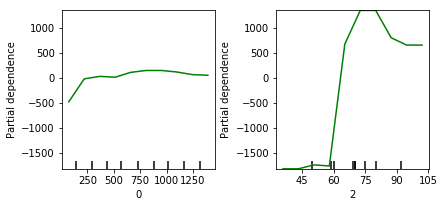

In [41]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

my_model = GradientBoostingRegressor()
my_model.fit(train_X, train_y)
my_plots = plot_partial_dependence(my_model,
                                  features=[0, 2],
                                  X = train_X,
                                  grid_resolution = 10)